---
format:
    html:
        embed-resources: true
---

# Lab: Logistic regression

Author: Dr. H and Gertrude Tiberius Pennington the 4th

Submit a rendered version of this notebook to Canvas

## Demonstration

See the following link for some starter code 

[https://jfh.georgetown.domains/centralized-lecture-content/content/machine-learning/parametric-machine-learning/logistic-regression/share/logistic-regression-stat-models-example/demo.html](https://jfh.georgetown.domains/centralized-lecture-content/content/machine-learning/parametric-machine-learning/logistic-regression/share/logistic-regression-stat-models-example/demo.html)

## Part 1: Univariate logistic regression

Consider the following scenario, assume you work at an amusement park as a data scientist!

* NOTE: I know this is a silly toy example but we have to start somewhere! 

![](images/2025-01-27-16-37-06.png)


Assume that a `supervisor` labeld the data as `is_adult` based on visual inspection.  

Toy data of this kind can be found in mass.json

## Load the data

In [1]:
# load the data
import json

with open('mass.json', 'r') as f:
    data = json.load(f)

# convert to pandas dataframe
import pandas as pd

df = pd.DataFrame(data)

# print the dataframe
print(df)

# extract the variables
age = df['x']
weight = df['y']
y = df['is_adult']


    xlabel ylabel  is_adult           x           y
0      age   mass         0    3.000000   48.766263
1      age   mass         0    3.389558   29.945973
2      age   mass         0    3.779116   49.316562
3      age   mass         0    4.168675   41.663606
4      age   mass         0    4.558233   57.909618
..     ...    ...       ...         ...         ...
245    age   mass         1   98.441767  183.863407
246    age   mass         1   98.831325  198.271147
247    age   mass         1   99.220884  185.151908
248    age   mass         1   99.610442  212.768955
249    age   mass         1  100.000000  194.726474

[250 rows x 5 columns]


## Basic univariate curve fitting

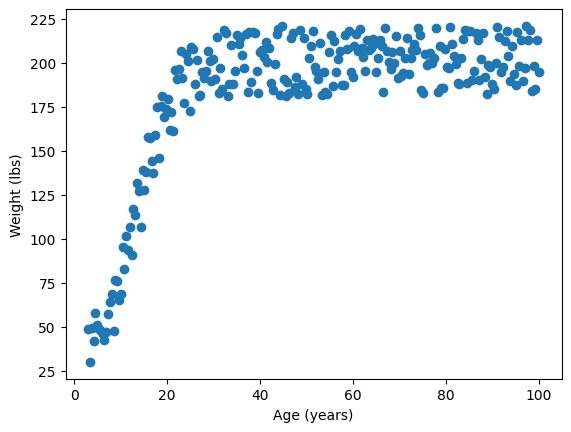

In [2]:
# plot the data
import matplotlib.pyplot as plt
plt.scatter(age, weight)

# axis labels
plt.xlabel('Age (years)')
plt.ylabel('Weight (lbs)')
plt.show()


`IMPORTANT:`  Notice that in this case the y values are not binary, but rather a continuous variable. So this is not a classification problem, but rather a regression problem. 

- **Import necessary library**:
  - Import `scipy.optimize` for optimization functions.

- **Define the sigmoid function**:
  - Implement $\sigma(x) = \frac{1}{1 + e^{-x}}$ , used for modeling non-linear relationships.

- **Define the fitting model**:
  - Create a model with parameters $a, b, c, d$  where $c \cdot \sigma\left(\frac{x - b}{a}\right) + d$  represents the relationship between input $x$  and output $y$ .

- **Define the loss function**:
  - Compute the mean squared error (MSE) between the actual data $y$  and model predictions $\text{model}(x, \text{params})$ .

- **Specify initial guesses**:
  - Use `params0 = [20, 0.1, 200, 0.1]` as starting points for $a, b, c, d$  in optimization.

- **Optimize the objective function**:
  - Use `opt.minimize` with the BFGS method to find parameters $a, b, c, d$  that minimize the loss function based on the data $\text{age}$  and $\text{weight}$ .

- **Print optimization results**:
  - Output the optimized parameters and optimization details.

- **Plot the data and model**:
  - Scatter-plot the actual data ($\text{age}, \text{weight}$ ).
  - Plot the model's predictions over a range of input values as a red curve.

- **Add axis labels and show the plot**:
  - Label the x-axis ($\text{Age (years)}$ ) and y-axis ($\text{Weight (lbs)}$ ), then display the plot.



Optimized Parameters: [  3.80285585  13.32305054 173.05645095  28.62304023]


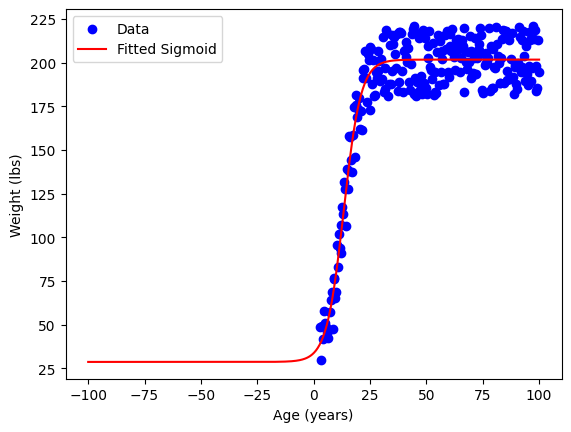

In [3]:
# INSTRUCTIONS: In this cell you should fit a sigmoid function to the age vs weight data,
# try to do it without normalizing the data, you should be able to choose a suitable inital guess by looking at the plot
# use a suitable parameterization of the sigmoid function
# define a model and a loss function
# optimize the loss function using scipy.optimize.minimize
# plot the data and the results

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the Sigmoid function
def sigmoid(x, a, b, c, d):
    return c / (1 + np.exp(-(x - b) / a)) + d

# Define the loss function
def loss_function(params, x, y):
    a, b, c, d = params
    y_pred = sigmoid(x, a, b, c, d)
    return np.mean((y - y_pred) ** 2)

# Parameter guesses
params0 = [20, 0.1, 200, 0.1]

# Optimize the parameters
result = minimize(loss_function, params0, args=(age, weight), method='BFGS')
optimized_params = result.x

# Print the optimized results
print("Optimized Parameters:", optimized_params)

# Plot the data
x_vals = np.linspace(-100, 100, 500)  # Define x-axis range
y_vals = sigmoid(x_vals, *optimized_params)

plt.scatter(age, weight, label='Data', color='blue')  # Scatter plot of data points
plt.plot(x_vals, y_vals, label='Fitted Sigmoid', color='red')  # Fitted curve
plt.xlabel('Age (years)')
plt.ylabel('Weight (lbs)')
plt.legend()
plt.show()



## Logistic regression

Now lets use the categorical variable `is_adult` so that we can predict the probability of being an adult based on weight. 


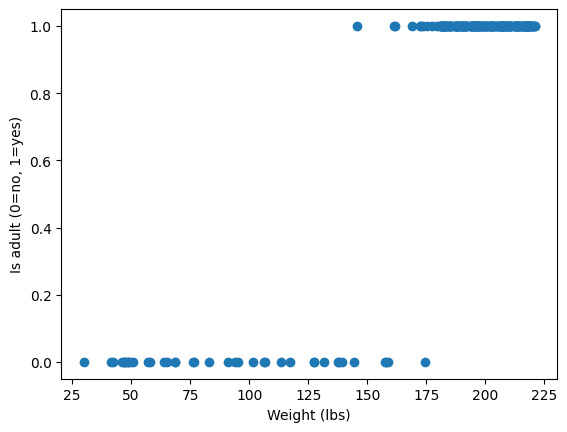

In [4]:
# plot the data
import matplotlib.pyplot as plt
plt.scatter(weight, y)

# axis labels
plt.xlabel('Weight (lbs)')
plt.ylabel('Is adult (0=no, 1=yes)')
plt.show()



### normalize the x data


In [5]:
# INSTRUCTIONS: normalize the weight data using z-score normalization

import numpy as np

# Normalize the weight data using Z-score normalization
mean_weight = np.mean(weight)  # Calculate mean of the weight
std_weight = np.std(weight)    # Calculate standard deviation of the weight

# Apply Z-score normalization
normalized_weight = (weight - mean_weight) / std_weight

# Print the first few normalized values
print("Normalized Weight:", normalized_weight[:10])

Normalized Weight: 0   -3.009783
1   -3.433103
2   -2.997406
3   -3.169542
4   -2.804124
5   -2.961297
6   -3.016528
7   -3.043256
8   -3.073541
9   -3.157781
Name: y, dtype: float64


## Training validation split

Do an 80-20 split of the data into training and validation sets. 

In [6]:
# INSTRUCTIONS: split the data into training and validation sets, use an 80-20 split and make sure it is a random split

# Import required library
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets (80-20 split)
x_train, x_val, y_train, y_val = train_test_split(
    normalized_weight,  # Normalized weight (independent variable)
    y,                  # Is adult (dependent variable)
    test_size=0.2,      # 20% of data for validation
    random_state=42     # Ensures reproducibility
)

# Print the size of training and validation sets
print("Training set size:", len(x_train))
print("Validation set size:", len(x_val))




Training set size: 200
Validation set size: 50


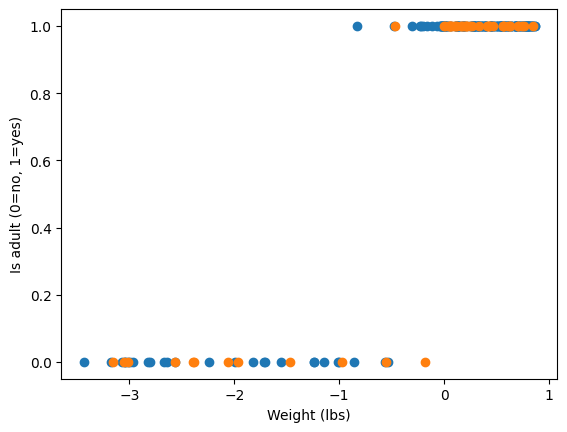

In [7]:
# plot the data
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train)
plt.scatter(x_val, y_val)

# axis labels
plt.xlabel('Weight (lbs)')
plt.ylabel('Is adult (0=no, 1=yes)')
plt.show()

In the following cell you should fit a logistic regression model to the training data. 

`IMPORTANT:` Technically we should use a cross entropy loss function, but we will use the mean squared error loss function for simplicity

- **Import necessary library**:
  - `scipy.optimize` is imported for optimization functions, specifically `opt.minimize` for minimizing the loss function.

- **Define the sigmoid function**:
  - Implements the equation $\sigma(x) = \frac{1}{1 + e^{-x}}$ , a common activation function used in logistic regression.

- **Define the model function**:
  - Takes input data $x$  and parameters $a, b$ , applies the sigmoid function to $ax + b$ , and returns the model's predicted probabilities.

- **Define the loss function**:
  - Calculates the mean squared error (MSE) between the actual $y$  values and the predicted $y$  values from the model.
  - Uses $\text{loss} = \frac{1}{n} \sum (y - \text{model}(x, params))^2$ .

- **Specify initial guess for parameters**:
  - `params0 = [0.1, 0.1]` provides an initial guess for the optimizer for $a$  and $b$ .

- **Optimize the loss function**:
  - `opt.minimize` finds the optimal $a$  and $b$  that minimize the loss function using the BFGS optimization algorithm.
  - Arguments include the loss function, initial parameter guess, and data ($\text{weight}, y$ ).

- **Print the optimization result**:
  - Displays the optimization outcome, including the optimal parameters $a, b$  and other details.

- **Plot the data and the fitted model**:
  - Creates a scatter plot of the data points ($\text{weight}, y$ ).
  - Overlays the model's predicted probabilities using the optimal parameters $a, b$  as a red curve.

- **Label the axes**:
  - Adds labels to the x-axis ($\text{Weight (lbs)}$ ) and y-axis ($\text{Is adult (0=no, 1=yes)}$ ).

- **Show the plot**:
  - Displays the plot with the data and the fitted curve.

- **Print the optimal parameters**:
  - Outputs the optimized values of $a$  and $b$  to the console.


message: Optimization terminated successfully.
success: True
status: 0
fun: 0.005016821006297331
x: [117.31948471  59.81392455]
nit: 30
jac: [-5.35656000e-06  8.81700544e-06]
hess_inv: [[8228951.01033207 4201747.54575364]
 [4201747.54575364 2146025.18470216]]
nfev: 117
njev: 39

optimal parameters: [ 117.31948471360226 59.813924546650526 ]


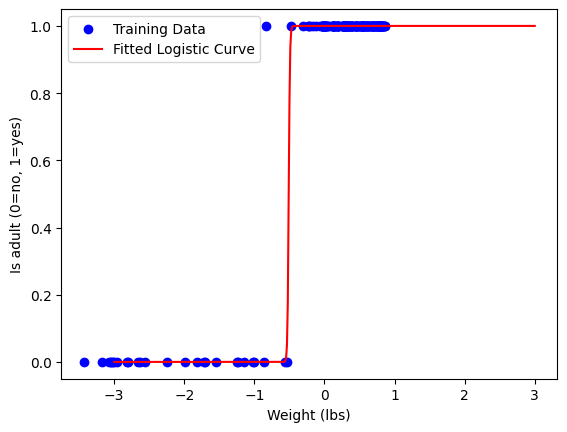

In [8]:
# INSTRUCTIONS: fit a logistic regression model to the training data

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt  

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the logistic regression model
def model(x, a, b):
    return sigmoid(a * x + b)

# Define the loss function (Mean Squared Error)
def loss_function(params, x, y):
    a, b = params  # Parameters to optimize
    y_pred = model(x, a, b)  # Predicted probabilities
    return np.mean((y - y_pred) ** 2)  # MSE between actual and predicted

# Initial parameter guess for optimization
params0 = [1.0, 1.0]  

# Perform optimization using BFGS algorithm
result = opt.minimize(loss_function, params0, args=(x_train, y_train), method='BFGS')

# Extract optimized parameters
a_opt, b_opt = result.x

# Print optimization results
print("message:", result.message)
print("success:", result.success)
print("status:", result.status)
print("fun:", result.fun)
print("x:", result.x)
print("nit:", result.nit)
print("jac:", result.jac)
print("hess_inv:", result.hess_inv.todense() if hasattr(result.hess_inv, "todense") else result.hess_inv)
print("nfev:", result.nfev)
print("njev:", result.njev)
print("\noptimal parameters: [", a_opt, b_opt, "]")

# Plot the training data and the fitted logistic curve
x_vals = np.linspace(-3, 3, 500)  # Range of x values for plotting
y_vals = model(x_vals, a_opt, b_opt)  # Predicted probabilities

plt.scatter(x_train, y_train, label='Training Data', color='blue')  # Training data points
plt.plot(x_vals, y_vals, label='Fitted Logistic Curve', color='red')  # Logistic regression curve
plt.xlabel('Weight (lbs)')
plt.ylabel('Is adult (0=no, 1=yes)')
plt.legend()
plt.show()



## Statsmodels

now lets repeat with statsmodel

In [9]:
# INSTRUCTIONS: fit a logistic regression model to the training data using statsmodels, output the summary of the model and a plot

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Add a constant term to the independent variable for the intercept
x_train_const = sm.add_constant(x_train)  # Adds a column of ones for the intercept term

# Print the shapes of x_train_const and y_train
print(x_train_const.shape, y_train.shape)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, x_train_const)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

# Generate predictions for plotting
x_val = np.linspace(-3, 3, 500)  # Define the range of x values
x_val_const = sm.add_constant(x_val)  # Add a constant for intercept
y_val = result.predict(x_val_const)  # Predicted probabilities






(200, 2) (200,)
Optimization terminated successfully.
         Current function value: 0.024255
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               is_adult   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                  0.9387
Time:                        13:15:13   Log-Likelihood:                -4.8510
converged:                       True   LL-Null:                       -79.156
Covariance Type:            nonrobust   LLR p-value:                 3.488e-34
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3309      1.739      3.066      0.002       1.923       8.739
y           

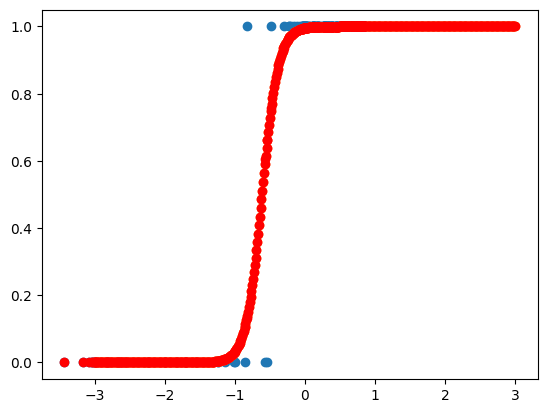

In [10]:
# plot the data and the results
plt.scatter(x_train, y_train)
plt.scatter(x_val, y_val)
plt.plot(x_train, result.predict(x_train_const), "ro")
plt.plot(x_val, result.predict(x_val_const), "ro")
plt.show()


# Part-3: Multi-class logistic regression

A logistic regressor is inherently a binary classifier, however, it can be extended to multi-class classification.

In the multiclass case, the training algorithm uses a one-vs.-all (OvA) scheme, rather than the “true” multinomial LR.

**OVA (One-vs-All)** and **OVR (One-vs-Rest)** are the same concept under different names. Both refer to a strategy used in multiclass classification problems where a classifier is trained for each class against all the other classes combined. Here's an example:


![](images/2025-01-27-16-55-43.png)



We will apply logistic regression to the digits dataset, which is a simplified version of the 28x28 MNIST dataset. 

The digits dataset is a collection of 1797 8x8 images of digits. 

target:  8


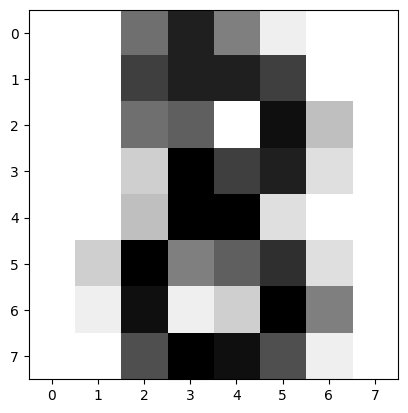

In [11]:
## import digits 

import sklearn.datasets as datasets

digits = datasets.load_digits()

# visualize a particular digit

import matplotlib.pyplot as plt
import numpy as np
random_index = np.random.choice(len(digits.data))
print("target: ", digits.target[random_index])

plt.imshow(digits.images[random_index], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()


In the case of the digits dataset, we have 10 classes, so we will need to train 10 logistic regressors (Sklearn will do this for us). 

Our model input is a vector X formed by flattening the 8x8 image into a 64-dimensional vector.

Our corresponding target is a one-hot encoded vector y of length 10, where each element is 0 or 1, depending on whether the digit is that class.

in the following code, we will split the data into training and validation sets. 

We will use 80% of the data for training and 20% for validation. 

In [20]:
# INSTRUCTIONS: in this cell you should split the data into training and validation sets. Make sure it is a random split. 

# split the data into training and validation sets

# 80-20 split

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import numpy as np

# Load the dataset
digits = load_digits()
X, y = digits.data, digits.target
indices = np.arange(len(X))  # original index

# Directly split the original index
idx_train, idx_val = train_test_split(
    indices, test_size=0.2, random_state=42, shuffle=True
)

# Use the split index to get the training set and validation set
X_train, X_val = X[idx_train], X[idx_val]
y_train, y_val = y[idx_train], y[idx_val]

# Print the first 10 values ​​of the training and validation indices
print("training_indices[:10]:", idx_train[:10])
print("validation_indices[:10]:", idx_val[:10])

# Print data shape
print(X_train.shape, X_val.shape)
print(len(idx_train), len(idx_val))



training_indices[:10]: [1734  855 1642  175  925  548 1615  334  756  433]
validation_indices[:10]: [1245  220 1518  438 1270  832  692 1309 1101 1742]
(1437, 64) (360, 64)
1437 360


The following code cell should train a logistic regression model using the One-vs-Rest classification strategy and evaluates its performance over a range of regularization strengths ($\text{L2 penalty}$) (i.e. hyperparameter-tuning). The model is trained and validated on given datasets ($x_{\text{train}}, y_{\text{train}}, x_{\text{val}}, y_{\text{val}}$). For each value of the regularization strength ($C = 1/\text{L2}$), the model is fitted, and predictions are made for both the training and validation datasets. The training and validation accuracies, along with the F1 scores (macro-averaged), are computed to assess the model's performance. The results, including accuracies and F1 scores, are stored and plotted to visualize how the model's performance changes with different regularization strengths, providing insights into the trade-off between underfitting and overfitting.

1/C=1000.0000, train_accuracy=0.919276270006959, val_accuracy=0.9, train_f1=0.9195138122285043, val_f1=0.8967205494361778
1/C=278.2559, train_accuracy=0.9464161447459986, val_accuracy=0.9305555555555556, train_f1=0.9469686666642984, val_f1=0.9282493638146893
1/C=77.4264, train_accuracy=0.9624217118997912, val_accuracy=0.9416666666666667, train_f1=0.9627806443488686, val_f1=0.9405074486738657
1/C=21.5443, train_accuracy=0.9819067501739736, val_accuracy=0.9583333333333334, train_f1=0.9820702901250907, val_f1=0.9579927446274578
1/C=5.9948, train_accuracy=0.9909533750869868, val_accuracy=0.9722222222222222, train_f1=0.9910638650028212, val_f1=0.9744299015600404
1/C=1.6681, train_accuracy=0.9979123173277662, val_accuracy=0.9722222222222222, train_f1=0.997951119603362, val_f1=0.9739667047321123
1/C=0.4642, train_accuracy=1.0, val_accuracy=0.9694444444444444, train_f1=1.0, val_f1=0.9709357058802179
1/C=0.1292, train_accuracy=1.0, val_accuracy=0.9694444444444444, train_f1=1.0, val_f1=0.9711231

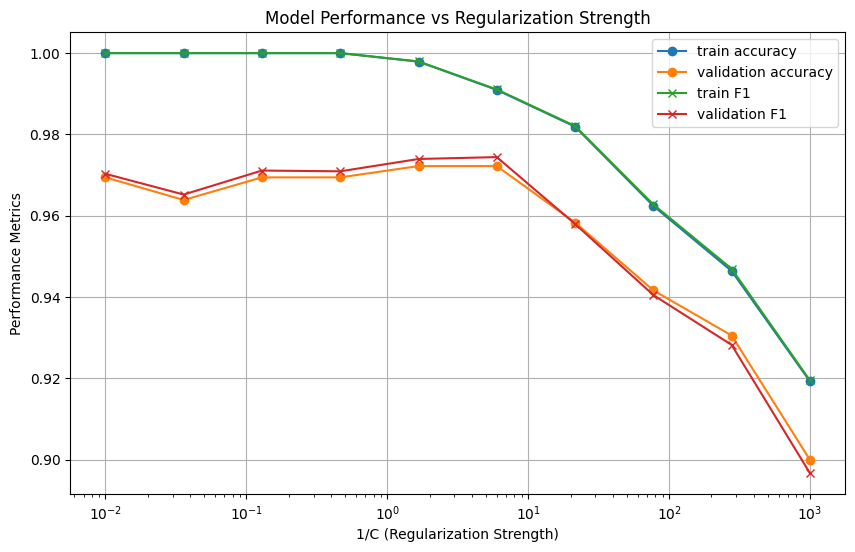

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define the range of regularization strengths
C_values = np.logspace(-3, 2, 10) 
train_accuracies = []
val_accuracies = []
train_f1_scores = []
val_f1_scores = []

# Iterate through each C value
for C in C_values:
    # Initialize the model with increased max_iter and remove deprecated parameters
    model = LogisticRegression(C=C, penalty='l2', solver='lbfgs', max_iter=2000)
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict and record the accuracy and F1 score for the training and validation sets
    y_train_pred = model.predict(X_train_scaled)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    train_f1_scores.append(f1_score(y_train, y_train_pred, average='macro'))
    
    y_val_pred = model.predict(X_val_scaled)
    val_accuracies.append(accuracy_score(y_val, y_val_pred))
    val_f1_scores.append(f1_score(y_val, y_val_pred, average='macro'))

# Print results in the format: 1/C, train_accuracy, val_accuracy, train_f1, val_f1
for C, train_acc, val_acc, train_f1, val_f1 in zip(C_values, train_accuracies, val_accuracies, train_f1_scores, val_f1_scores):
    print(f"1/C={1/C:.4f}, train_accuracy={train_acc}, val_accuracy={val_acc}, train_f1={train_f1}, val_f1={val_f1}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(1 / C_values, train_accuracies, label="train accuracy", marker='o')
plt.plot(1 / C_values, val_accuracies, label="validation accuracy", marker='o')
plt.plot(1 / C_values, train_f1_scores, label="train F1", marker='x')
plt.plot(1 / C_values, val_f1_scores, label="validation F1", marker='x')
plt.xscale('log')
plt.xlabel('1/C (Regularization Strength)')
plt.ylabel('Performance Metrics')
plt.title('Model Performance vs Regularization Strength')
plt.legend()
plt.grid(True)
plt.show()



In [28]:
# INSTRUCTIONS: select the optimal value of C and retrain the model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Identify the optimal value of C based on validation accuracy
optimal_C_index = np.argmax(val_accuracies)
optimal_C = C_values[optimal_C_index]

print(f"Optimal C: {optimal_C}")

# Retrain the model using the optimal C
final_model = LogisticRegression(C=optimal_C, penalty='l2', solver='lbfgs', max_iter=2000)

# Train the final model
final_model.fit(X_train_scaled, y_train)

# Evaluate the final model on the training and validation sets
y_train_pred = final_model.predict(X_train_scaled)
y_val_pred = final_model.predict(X_val_scaled)

final_train_accuracy = accuracy_score(y_train, y_train_pred)
final_val_accuracy = accuracy_score(y_val, y_val_pred)
final_train_f1 = f1_score(y_train, y_train_pred, average='macro')
final_val_f1 = f1_score(y_val, y_val_pred, average='macro')

# Output the results
print(f"Final Model - Train Accuracy: {final_train_accuracy}, Validation Accuracy: {final_val_accuracy}")
print(f"Final Model - Train F1 Score: {final_train_f1}, Validation F1 Score: {final_val_f1}")


Optimal C: 0.1668100537200059
Final Model - Train Accuracy: 0.9909533750869868, Validation Accuracy: 0.9722222222222222
Final Model - Train F1 Score: 0.9910638650028212, Validation F1 Score: 0.9744299015600404


In [29]:
# in the following cells you should report the performance of the model on the training and validation sets

from sklearn.metrics import classification_report, confusion_matrix
def report(model, x, y):
    y_pred = model.predict(x)
    print(classification_report(y, y_pred))

    # confusion matrix 
    print(confusion_matrix(y, y_pred))


In [31]:
report(model, X_train, y_train)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       145
           1       0.49      1.00      0.66       154
           2       0.98      0.94      0.96       144
           3       1.00      0.77      0.87       149
           4       1.00      0.07      0.14       135
           5       0.92      0.94      0.93       135
           6       0.93      0.88      0.90       146
           7       1.00      0.81      0.89       145
           8       0.92      0.84      0.88       144
           9       0.68      1.00      0.81       140

    accuracy                           0.82      1437
   macro avg       0.89      0.82      0.80      1437
weighted avg       0.89      0.82      0.80      1437

[[131   4   0   0   0   5   0   0   0   5]
 [  0 154   0   0   0   0   0   0   0   0]
 [  0   7 136   0   0   0   0   0   0   1]
 [  0   0   3 115   0   2   0   0   8  21]
 [  0 103   0   0  10   2   9   0   1  10]
 [  0   1   0   0   0 127 

In [33]:
report(model, X_val, y_val)


              precision    recall  f1-score   support

           0       1.00      0.82      0.90        33
           1       0.39      1.00      0.56        28
           2       0.97      0.91      0.94        33
           3       1.00      0.79      0.89        34
           4       1.00      0.17      0.30        46
           5       0.88      0.91      0.90        47
           6       0.97      0.91      0.94        35
           7       1.00      0.82      0.90        34
           8       0.93      0.87      0.90        30
           9       0.68      0.97      0.80        40

    accuracy                           0.80       360
   macro avg       0.88      0.82      0.80       360
weighted avg       0.89      0.80      0.79       360

[[27  1  1  0  0  1  0  0  0  3]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  3 30  0  0  0  0  0  0  0]
 [ 0  0  0 27  0  1  0  0  2  4]
 [ 0 34  0  0  8  1  0  0  0  3]
 [ 0  0  0  0  0 43  1  0  0  3]
 [ 0  2  0  0  0  1 32  0  0  0]
 [ 0  0  0

**Written Assignment**:  In your own words, describe the previous code cell outputs and what they mean.

The model performed reasonably during the training phase, accruing an accuracy rate of 82%. According to the classification report, some categories (particularly categories 0 and 2) have outstanding recall and precision figures of 1.00 and 0.90 (category 0), and 0.98 and 0.94 (category 2), respectively. Nevertheless, it is important to note that these categories are very well defined within the model. On the other hand, categories 1 and 4 have greatly suffered in terms of model accuracy. The recall for class 1 is admirably high at 1.00; however, the precision is abysmal at 0.49, indicating that far too many instances of class 1 are incorrectly predicted to be examples of class 1. The recall for class 4 is a dismal 0.07, meaning that the model fails to predict class 4 data accurately.

Compared to the training set, the overall accuracy of the model in the validation set is slightly lower and rests at eighty percent. This suggests that the model’s generalization ability is of a reasonable level. The majority of categories still manage to achieve precision and recall performance levels which are similar to those of the training set. For example, categories 2 and 6 have retained their levels of performance by keeping their F1 scores at a stable 0.94 and 0.90, respectively. But, once again the concern arises for category 4 with the figure for recall being as low as 0.17, which shows that the model is very poor at remembering actual instances of this category. This could be due to the data distribution or fewer sample sizes for category 4. 

The confusion matrix highlights the classification results in more detail and informs how the predicted labels clash with the true labels for every class within the dataset. Considering class 0, for example, out of 145 training samples, 131 were correctly classified leaving 14 out of 145 samples where students were placed into other classes, meaning that students had to be relocated into other classes. This data indicates that the model for this category behaves with some sort of restriction when it comes to classification. The same is true for the validation set, particularly for categories 4 and 9.

Overall, the model coverage is reasonably good across most categories, though it is painfully deficient in some (most notably, category 4). Considering these results, we should engage in further optimization of the model. For instance, we can retune the regularization parameters, increase the volume of training data, or even apply a more sophisticated model to achieve higher performance.

